<a href="https://colab.research.google.com/github/manas-svg/Student-Enrollment-Conversion-Funnel-Analysis/blob/main/funnel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("edtech_user_funnel.csv")

# Preview data
df.head()



,user_id,visit_date,awareness_source,device_type,visited_site,viewed_course,viewed_pricing,enrolled,time_spent_min,returning_user
0,1,2024-01-01,Referral,Mobile,Yes,Yes,No,Yes,17,No
1,2,2024-01-02,Organic Search,Mobile,Yes,Yes,No,No,28,Yes
2,3,2024-01-03,Social Media,Mobile,Yes,Yes,Yes,No,41,No
3,4,2024-01-04,Referral,Desktop,Yes,Yes,No,Yes,2,No
4,5,2024-01-05,Referral,Mobile,Yes,Yes,Yes,No,25,No


In [2]:
# Shape of dataset
df.shape


(1000, 10)

In [3]:
# Column names & data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1000 non-null   int64 
 1   visit_date        1000 non-null   object
 2   awareness_source  1000 non-null   object
 3   device_type       1000 non-null   object
 4   visited_site      1000 non-null   object
 5   viewed_course     1000 non-null   object
 6   viewed_pricing    1000 non-null   object
 7   enrolled          1000 non-null   object
 8   time_spent_min    1000 non-null   int64 
 9   returning_user    1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [4]:
# Missing values
df.isna().sum()


,0
user_id,0
visit_date,0
awareness_source,0
device_type,0
visited_site,0
viewed_course,0
viewed_pricing,0
enrolled,0
time_spent_min,0
returning_user,0


In [5]:
# Basic statistics
df.describe()


,user_id,time_spent_min
count,1000.000000,1000.000000
mean,500.500000,22.303000
std,288.819436,12.571047
min,1.000000,1.000000
25%,250.750000,12.000000
50%,500.500000,22.000000
75%,750.250000,33.000000
max,1000.000000,44.000000


In [6]:
# Value counts for categorical features
categorical_cols = ["awareness_source", "device_type", "returning_user"]

for col in categorical_cols:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())



AWARENESS_SOURCE
awareness_source
Organic Search    280
Social Media      258
Referral          232
Paid Ads          230
Name: count, dtype: int64

DEVICE_TYPE
device_type
Mobile     705
Desktop    295
Name: count, dtype: int64

RETURNING_USER
returning_user
No     665
Yes    335
Name: count, dtype: int64


In [7]:
funnel_cols = ["visited_site", "viewed_course", "viewed_pricing", "enrolled"]

df[funnel_cols].sum()


,0
visited_site,YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
viewed_course,YesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYes...
viewed_pricing,NoNoYesNoYesYesNoYesNoNoYesNoYesYesNoNoYesYesN...
enrolled,YesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesY...


In [9]:
funnel_cols = ["visited_site", "viewed_course", "viewed_pricing", "enrolled"]

df[funnel_cols] = df[funnel_cols].replace({
    "Yes": 1,
    "No": 0
})


/tmp/ipython-input-3958381310.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[funnel_cols] = df[funnel_cols].replace({


In [10]:
funnel_counts = df[funnel_cols].sum()

dropoff_df = pd.DataFrame({
    "Stage": funnel_cols,
    "Users": funnel_counts.values
})

dropoff_df


,Stage,Users
0,visited_site,1000
1,viewed_course,807
2,viewed_pricing,581
3,enrolled,361


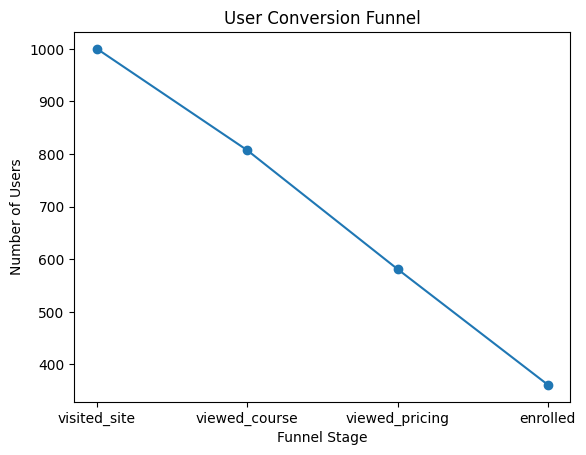

In [11]:
plt.figure()
plt.plot(dropoff_df["Stage"], dropoff_df["Users"], marker="o")
plt.title("User Conversion Funnel")
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.show()


In [12]:
conversion_rates = []

for i in range(len(funnel_cols) - 1):
    rate = (funnel_counts[i + 1] / funnel_counts[i]) * 100
    conversion_rates.append(round(rate, 2))

conversion_df = pd.DataFrame({
    "From → To": [
        "Visited → Course",
        "Course → Pricing",
        "Pricing → Enrollment"
    ],
    "Conversion %": conversion_rates
})

conversion_df


/tmp/ipython-input-4104658816.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = (funnel_counts[i + 1] / funnel_counts[i]) * 100


,From → To,Conversion %
0,Visited → Course,80.70
1,Course → Pricing,72.00
2,Pricing → Enrollment,62.13


In [13]:
overall_enrollment_rate = df["enrolled"].mean() * 100
round(overall_enrollment_rate, 2)


np.float64(36.1)

In [14]:
enrollment_by_source = (
    df.groupby("awareness_source")["enrolled"]
    .mean()
    .sort_values(ascending=False)
)

enrollment_by_source


,enrolled
awareness_source,
Referral,0.418103
Paid Ads,0.382609
Organic Search,0.353571
Social Media,0.298450


In [15]:
enrollment_by_device = (
    df.groupby("device_type")["enrolled"]
    .mean()
    .sort_values(ascending=False)
)

enrollment_by_device


,enrolled
device_type,
Desktop,0.376271
Mobile,0.354610


In [16]:
returning_user_conversion = (
    df.groupby("returning_user")["enrolled"]
    .mean()
)

returning_user_conversion


,enrolled
returning_user,
No,0.363910
Yes,0.355224


In [18]:
# Time spent by device
df.groupby("device_type")["time_spent_min"].mean()


,time_spent_min
device_type,
Desktop,22.755932
Mobile,22.113475


### Key EDA Observations
- Major drop-off occurs between pricing view and enrollment.
- Returning users have higher enrollment probability than new users.
- Certain awareness sources drive high traffic but low conversion.
- Desktop users spend more time and convert better than mobile users.
- Higher time spent is strongly associated with enrollment.
